In [1]:
import scanpy as sc
import numpy as np
import milopy
import milopy.core as milo
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=(8,8) #rescale figures
sc.settings.verbosity = 3

In [2]:
sc.settings.set_figure_params(dpi=150)

In [3]:
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42

In [4]:
test1 = sc.read_h5ad('../../data/Wang_2023_CRCLM/sc/sc_st_L1.h5ad')

In [5]:
test2 = sc.read_h5ad('../../data/Wang_2023_CRCLM/sc/sc_st_L1_cancer_filter.h5ad')

In [6]:
test3 = test1.concatenate(test2)

/opt/conda/lib/python3.8/site-packages/anndata/_core/anndata.py:1785: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  [AnnData(sparse.csr_matrix(a.shape), obs=a.obs) for a in all_adatas],
/opt/conda/lib/python3.8/site-packages/anndata/_core/anndata.py:1785: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  [AnnData(sparse.csr_matrix(a.shape), obs=a.obs) for a in all_adatas],


In [7]:
stdata = sc.read_h5ad('../../data/Wang_2023_CRCLM/st/annotated_L1.h5ad')

In [8]:
stdata.uns['Region_colors'] = ['#d6a8a3','#7f74ba']

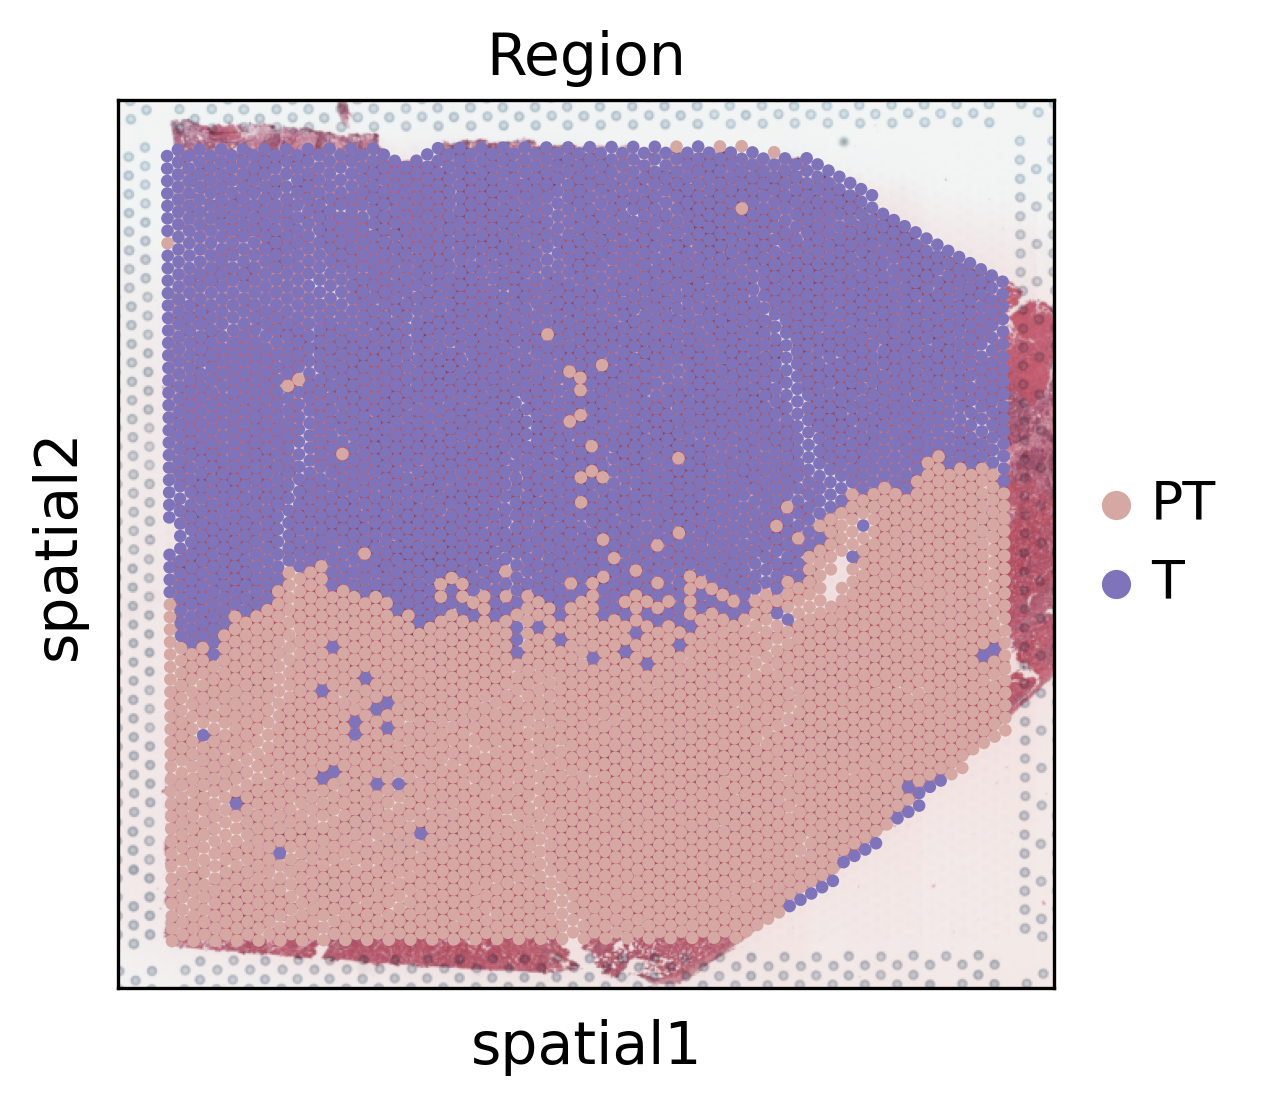

In [9]:
sc.pl.spatial(stdata,color='Region',spot_size=200)

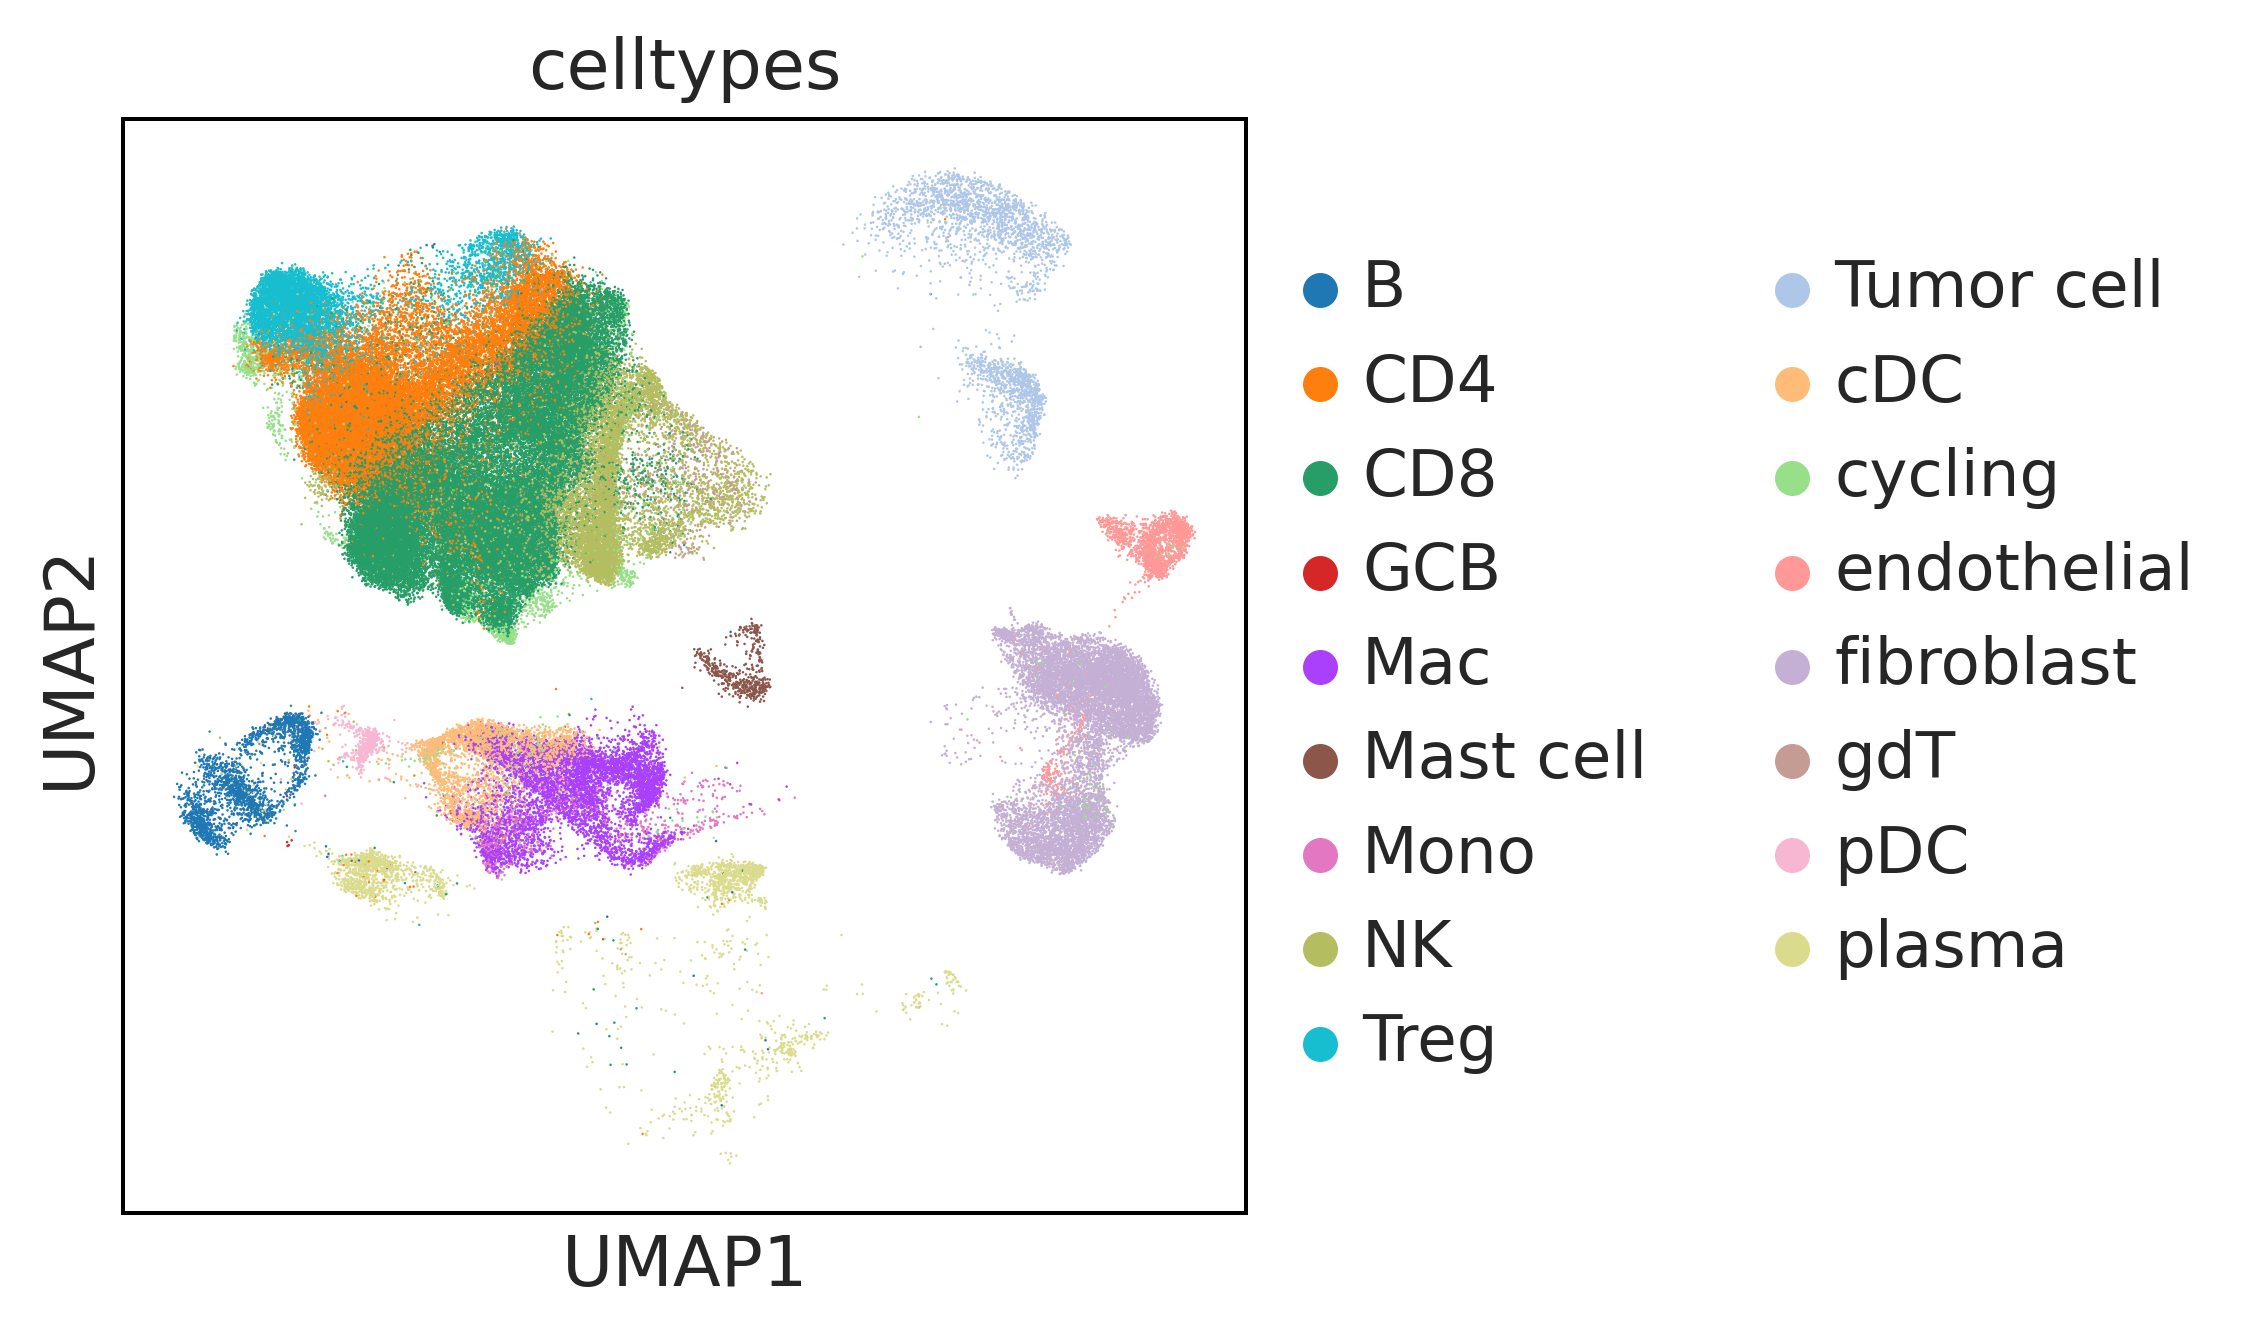

In [141]:
sc.pl.umap(test3,color='celltypes')

In [9]:
cDC = test1[test1.obs['celltypes']=='cDC']

In [10]:
sc.tl.umap(cDC)

computing UMAP


/opt/conda/lib/python3.8/site-packages/anndata/compat/_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value


    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:10)


In [11]:
cDC.obs["patients_region"] = cDC.obs["patients"].astype('str') + cDC.obs["sp_cluster"].astype('str') 

In [8]:
import numpy.matlib

In [59]:
cDC_sub.obsm['spatial'][:,1] = cDC_sub.obsm['spatial'][:,1]*-1

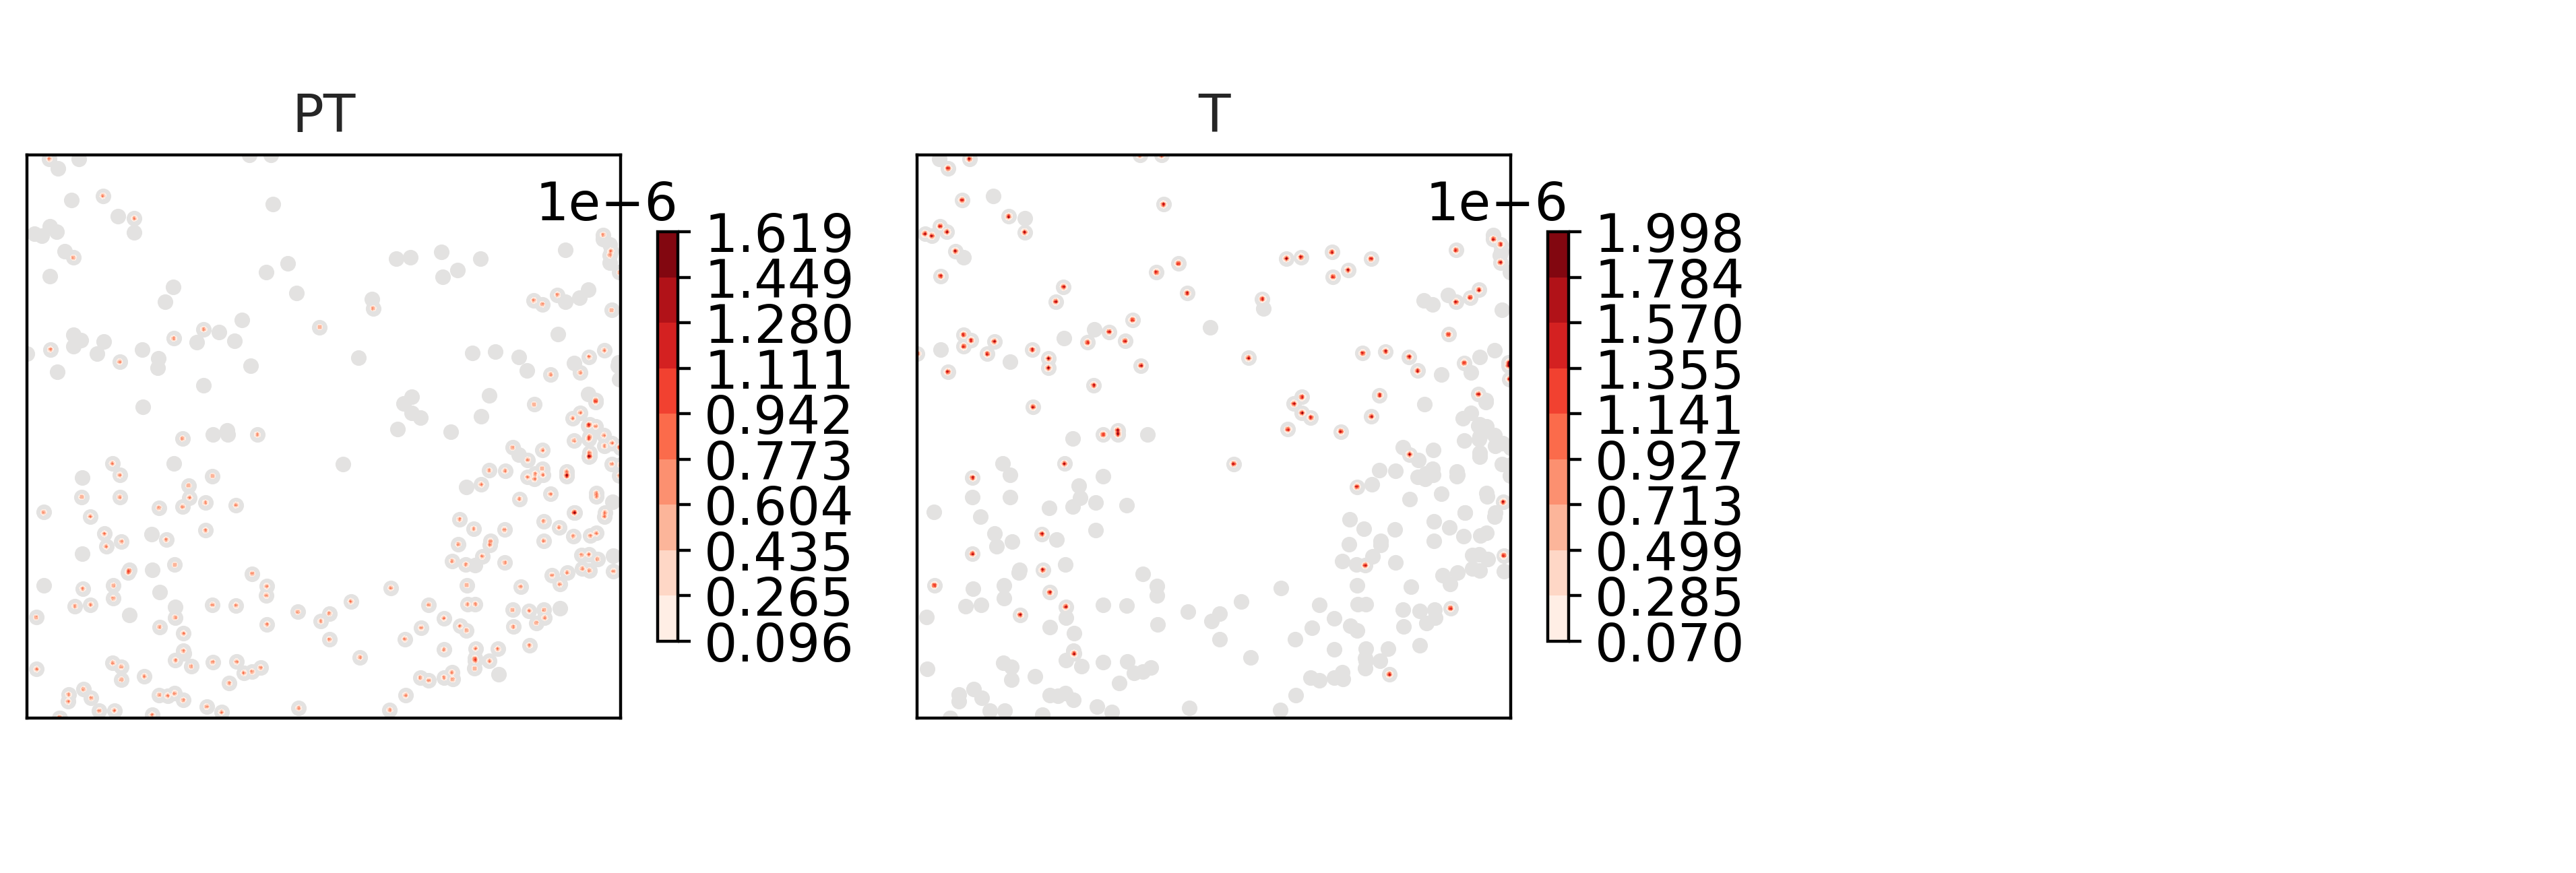

In [62]:
scpk.density_plot(cDC_sub, basis='spatial', type_keys='Enrich',cmap=de.mymap,bandwidth=30,savefig='./figures/cDC_density.pdf')

In [68]:
cDC.obsm['spatial'][:,1] = cDC.obsm['spatial'][:,1]*-1

In [83]:
import matplotlib.pyplot as plt
# plt.rcParams['scatter.marker'] = '.'  # 设置散点图点的标记形状
plt.rcParams['scatter.marker'] = 'o'

In [94]:
cDC.obsm['spatial'][:,0] = cDC.obsm['spatial'][:,0]/1500
cDC.obsm['spatial'][:,1] = cDC.obsm['spatial'][:,1]/1500

In [95]:
cDC.obsm['spatial'][:,1] = cDC.obsm['spatial'][:,1]*-1

In [89]:
cDC.obs.loc[(cDC.obs['sp_cluster']=='T')&(cDC.obs['Enrich']=='PT'),'Enrich'] = 'Neutrality'
cDC.obs.loc[(cDC.obs['sp_cluster']=='PT')&(cDC.obs['Enrich']=='T'),'Enrich'] = 'Neutrality'

In [13]:
## Build KNN graph
sc.pp.neighbors(cDC, n_neighbors=10,metric='cosine')

## Assign cells to neighbourhoods
milo.make_nhoods(cDC,prop=0.1)

## Count cells from each sample in each nhood
milo.count_nhoods(cDC, sample_col="patients_region")

computing neighbors
    using 'X_pca' with n_pcs = 50
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:05)


/opt/conda/lib/python3.8/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


In [14]:
## Test for differential abundance between conditions
milo.DA_nhoods(cDC, design="~ sp_cluster")
## Check results
milo_results = cDC.uns["nhood_adata"].obs
milo_results

,index_cell,kth_distance,logFC,logCPM,F,PValue,FDR,SpatialFDR
0,s0920_SampleTag08-157633s8-3_4-1,0.054167,0.485578,13.219723,0.125688,0.722974,0.998878,0.998878
1,s0920_SampleTag08-652366s8-3_4-1,0.033072,0.340638,13.484152,0.057814,0.810004,0.998878,0.998878
2,s0920_SampleTag08-702364s8-3_4-1,0.034961,0.912922,13.514893,0.387191,0.533832,0.998878,0.998878
3,s0920_SampleTag08-358262s8-3_4-1,0.031071,0.870838,13.637491,0.314187,0.575169,0.998878,0.998878
4,s0920_SampleTag08-92754s8-3_4-1,0.035005,0.307483,13.219475,0.051248,0.820923,0.998878,0.998878
...,...,...,...,...,...,...,...,...
219,s0816_SampleTag01-719276s10-2_4-1,0.027528,1.204560,14.046197,0.614773,0.433066,0.998878,0.998878
220,s0816_SampleTag01-438613s10-2_4-1,0.049791,0.204886,13.266601,0.021005,0.884777,0.998878,0.998878
221,s0816_SampleTag01-243691s10-2_4-1,0.029361,1.496311,13.964945,0.897759,0.343468,0.998878,0.998878
222,s0816_SampleTag01-273091s10-2_4-1,0.031428,0.310200,13.689868,0.038374,0.844710,0.998878,0.998878


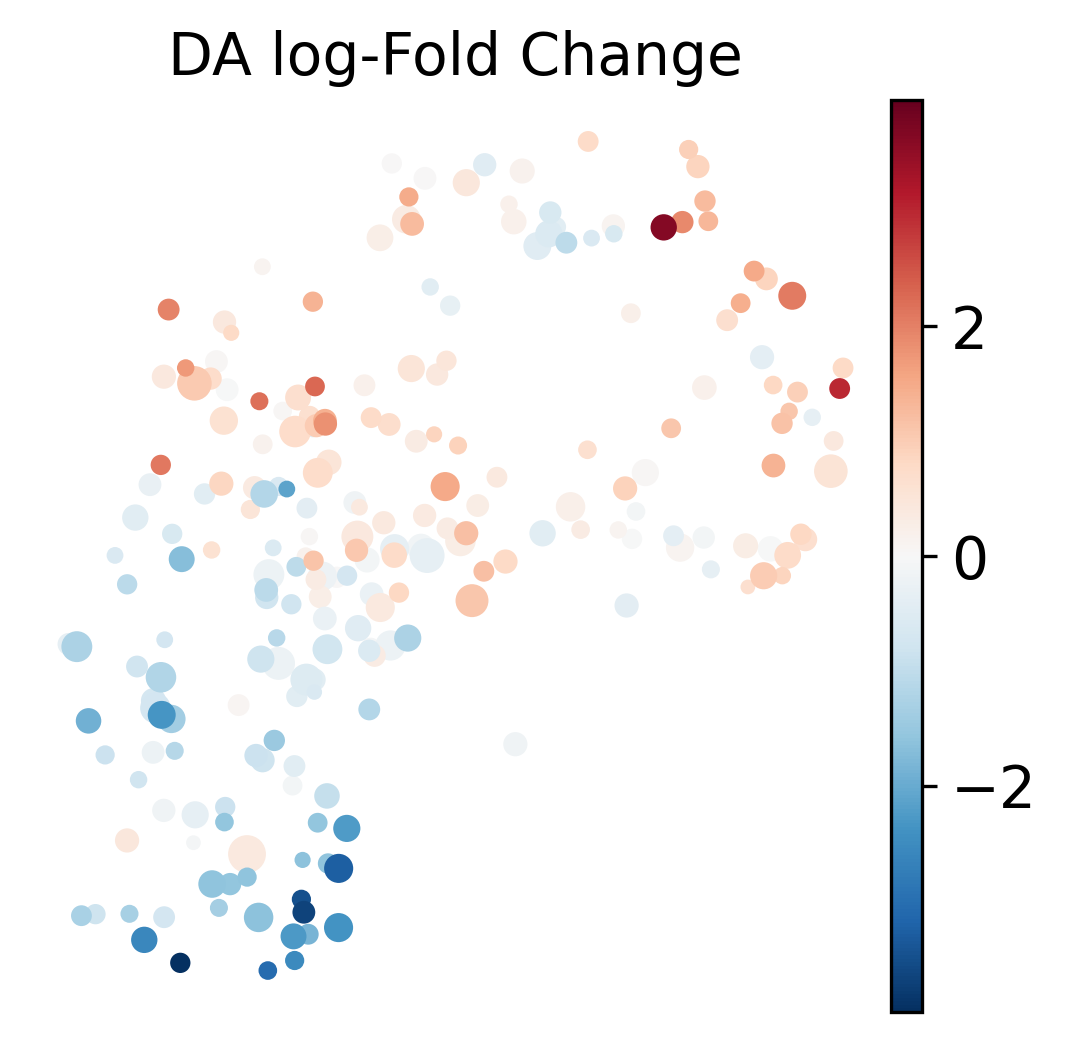

In [15]:
milopy.utils.build_nhood_graph(cDC)
milopy.plot.plot_nhood_graph(cDC, alpha=1, min_size=5,plot_edges=False)